<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Titanic_II.jpg/1200px-Titanic_II.jpg" width=500>


## Kaggle URL

* https://www.kaggle.com/competitions/titanic


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드

In [4]:
# train, test
import glob
glob.glob('data/titanic/*')

['data/titanic/submit.csv',
 'data/titanic/test.csv',
 'data/titanic/train.csv',
 'data/titanic/gender_submission.csv']

In [5]:
train = pd.read_csv('data/titanic/train.csv')
train.shape

(891, 12)

In [6]:
test = pd.read_csv('data/titanic/test.csv')
test.shape

(418, 11)

## label값 빈도수

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

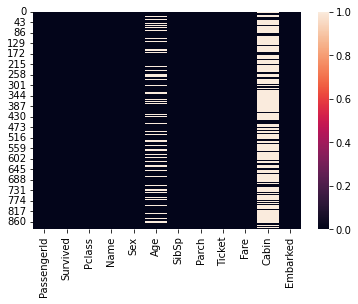

In [9]:
sns.heatmap(train.isnull())

## 학습과 예측 전체 과정

* feature_names : 학습(훈련), 예측에 사용할 컬럼을 리스트 형태로 만들어서 변수에 담아줍니다.
* label_name : 정답값

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)


## 정답값이자 예측해야 될 값

In [10]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = 'Survived'
label_name

'Survived'

## 학습, 예측에 사용할 컬럼

In [11]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
feature_names = train.select_dtypes(include = 'number').columns.tolist()
feature_names.remove(label_name)
feature_names

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## 학습, 예측 데이터셋 만들기

<img src="https://i.imgur.com/yvBtRtJ.png" width="600">

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

In [13]:
# X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
# 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제
X_train = train[feature_names].copy()
print(X_train.shape)
X_train.head(2)

(891, 6)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833


In [14]:
X_train['Age'].isnull().sum()

177

In [15]:
# X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
# 예측에 사용할 데이터셋 예) 실전 시험문제
X_test = test[feature_names].copy()
print(X_test.shape)
X_test.head(2)

(418, 6)


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000


In [16]:
# y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
# 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답
y_train = train[label_name]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## 머신러닝 알고리즘 가져오기
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)


* 결과를 해석하고 이해하기 쉽다.간략한 설명만으로 결정 트리를 이해하는 것이 가능하다.
* 자료를 가공할 필요가 거의 없다.다른 기법들의 경우 자료를 정규화하거나 임의의 변수를 생성하거나 값이 없는 변수를 제거해야 하는 경우가 있다.
* 수치 자료와 범주 자료 모두에 적용할 수 있다.다른 기법들은 일반적으로 오직 한 종류의 변수를 갖는 데이터 셋을 분석하는 것에 특화되어 있다. (일례로 신경망 학습은 숫자로 표현된 변수만을 다룰 수 있는 것에 반해 관계식(relation rules)은 오직 명목 변수만을 다룰 수 있다.
* 화이트박스 모델을 사용한다. 모델에서 주어진 상황이 관측 가능하다면 불 논리를 이용하여 조건에 대해 쉽게 설명할 수 있다. (결과에 대한 설명을 이해하기 어렵기 때문에 인공신경망은 대표적인 블랙 박스 모델이다.)
* 안정적이다. 해당 모델 추리의 기반이 되는 명제가 다소 손상되었더라도 잘 동작한다.
* 대규모의 데이터 셋에서도 잘 동작한다. 방대한 분량의 데이터를 일반적인 컴퓨터 환경에서 합리적인 시간 안에 분석할 수 있다.


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # The number of features to consider when looking for the best split
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```

* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 기능입니다.
    * max_depth: 트리의 최대 깊이입니다.
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수입니다.
    * max_leaf_nodes: 리프 노드 숫자의 제한치입니다.
    * random_state: 추정기의 무작위성을 제어합니다. 실행했을 때 같은 결과가 나오도록 합니다.

In [17]:
# max_depth == 1 트리의 깊이를 의미합니다.
# max_features == 0.9 라면 전체 피처의 90% 만 사용합니다.
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy')
model

DecisionTreeClassifier(criterion='entropy')

In [18]:
X_train['Age'] = X_train['Age'].fillna(0)
X_test['Age'] = X_test['Age'].fillna(0)
X_test['Fare'] = X_test['Fare'].fillna(0)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [20]:
X_test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [21]:
y_predict = model.predict(X_test)
y_predict[:10]

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0])

## 트리 알고리즘 분석하기


<img src="https://i.imgur.com/KM7SVAs.png" width="500">

### 지니 불순도

* 지니 불순도는 집합에 이질적인 것이 얼마나 섞였는지를 측정하는 지표이며 CART 알고리즘에서 사용한다. 어떤 집합에서 한 항목을 뽑아 무작위로 라벨을 추정할 때 틀릴 확률을 말한다. 집합에 있는 항목이 모두 같다면 지니 불순도는 최솟값(0)을 갖게 되며 이 집합은 완전히 순수하다고 할 수 있다.

<img src="https://i.imgur.com/gUe5JeO.png">

### 엔트로피 - 정보획득량 

*  ID3, C4.5 그리고 C5.0 트리 생성 알고리즘에서 사용되고 있다. 정보 획득량(information gain)은 정보 이론의 엔트로피의 개념에 근거를 두고 있다.
* 기술적인 관점에서 보면 정보는 발생 가능한 사건이나 메시지의 확률분포의 음의 로그로 정의할 수 있다. 각 사건의 정보량은 그 기댓값, 또는 평균이 섀넌 엔트로피인 확률변수를 형성한다. 
* [정보 엔트로피 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B3%B4_%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC)

<img src="https://i.imgur.com/cz9IxB3.png">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Binary_entropy_plot.svg/1920px-Binary_entropy_plot.svg.png" width="200">

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Entropy_flip_2_coins.jpg" width="200">

2 섀넌의 엔트로피: 2 개의 공정한 동전을 던질 때 정보 엔트로피는 발생 가능한 모든 결과의 개수에 밑이 2 인 로그를 취한 것과 같다. 2 개의 동전을 던지면 4 가지 결과가 발생할 수 있고, 엔트로피는 2 비트가 된다. 일반적으로 정보 엔트로피는 모든 발생가능한 결과의 평균적인 정보가 된다.




|클래스 개수| 최소엔트로피 | 최대엔트로피 |
|:--|:--|:--|
|2 == 2 ** 1 | 0 | 1 |
|8 == 2 ** 3 | 0 | 3 |
|16 == 2 ** 4 | 0 | 4 |

In [22]:
# 엔트로피 - 불확실성이 높을 때
- ((1/2) * np.log2(1/2) + (1/2) * np.log2(1/2))

1.0

In [23]:
# 엔트로피 - 확실하게 구분이 될 때, 불확실성이 낮음
- ((1/2) * np.log2(2/2) + (0/2) * np.log2(1/2))

-0.0

In [24]:
# 루트노드의 엔트로피 구하기
X_train.shape[0], X_train

(891,
      PassengerId  Pclass   Age  SibSp  Parch     Fare
 0              1       3  22.0      1      0   7.2500
 1              2       1  38.0      1      0  71.2833
 2              3       3  26.0      0      0   7.9250
 3              4       1  35.0      1      0  53.1000
 4              5       3  35.0      0      0   8.0500
 ..           ...     ...   ...    ...    ...      ...
 886          887       2  27.0      0      0  13.0000
 887          888       1  19.0      0      0  30.0000
 888          889       3   0.0      1      2  23.4500
 889          890       1  26.0      0      0  30.0000
 890          891       3  32.0      0      0   7.7500
 
 [891 rows x 6 columns])

In [25]:
- ((549/891) * np.log2(549/891) + (342/891) * np.log2(342/891))

0.9607079018756469

[]

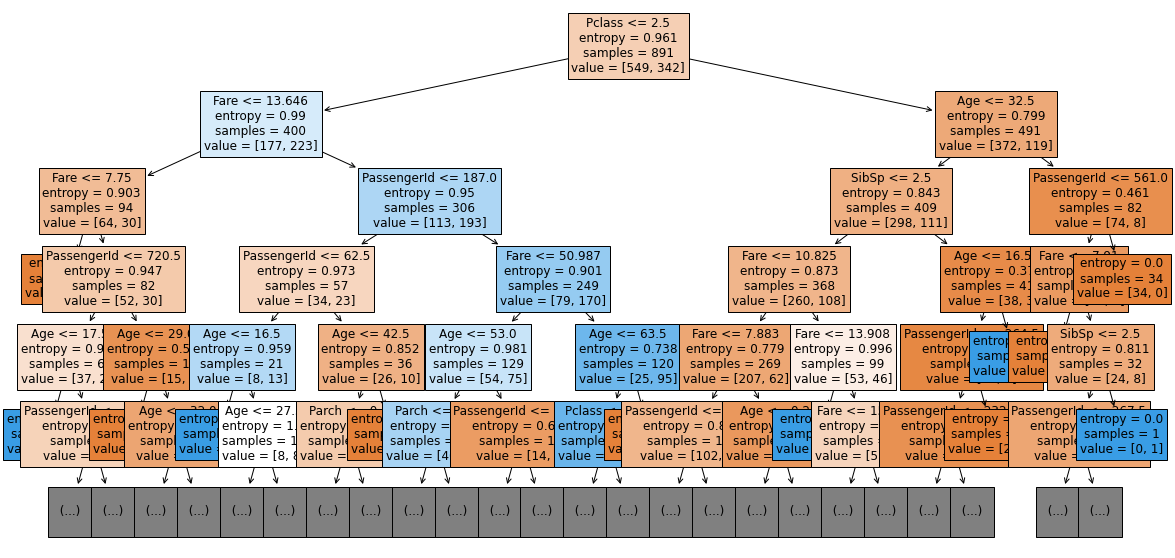

In [26]:
# plot_tree 를 통해 시각화 합니다.
from sklearn.tree import plot_tree

plt.figure(figsize = (20,10))
plot_tree(model, max_depth = 5, feature_names = feature_names, filled = True, fontsize = 12)
plt.plot()

In [27]:
# 피처의 중요도 추출하기
model.feature_importances_

array([0.3644268 , 0.0862604 , 0.25972932, 0.02861042, 0.01959332,
       0.24137973])

<AxesSubplot:>

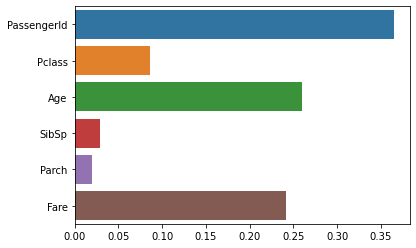

In [28]:
# 피처의 중요도 시각화 하기
sns.barplot(x = model.feature_importances_, y = feature_names)

## 제출하기

In [30]:
df_submit = pd.read_csv('data/titanic/gender_submission.csv')
df_submit.shape

(418, 2)

In [31]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [32]:
df_submit[label_name] = y_predict

In [33]:
df_submit.to_csv('data/titanic/submit2.csv')

In [34]:
pd.read_csv('data/titanic/submit2.csv')

,Unnamed: 0,PassengerId,Survived
0,0,892,0
1,1,893,0
2,2,894,1
3,3,895,1
4,4,896,1
...,...,...,...
413,413,1305,0
414,414,1306,1
415,415,1307,0
416,416,1308,0
